In [ ]:
!pip install python-dotenv
!pip install replicate
!pip install pandas
!pip install seaborn

  Using cached python_dotenv-1.1.1-py3-none-any.whl.metadata (24 kB)
Using cached python_dotenv-1.1.1-py3-none-any.whl (20 kB)


In [16]:
import json
from dotenv import load_dotenv
import replicate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv()  # take environment variables

True

In [6]:
with open(r'../data/video_test_cases.json', 'r') as f:
    video_test_cases = json.load(f)

In [7]:
# KPI: Visual Engagement Potential
def prompt_visual_engagement_potenial(caption:str):
    prompt = "The video belongs to an Instagram post. The following TEXT is the caption of this post:\n"
    prompt += "TEXT: "
    prompt += caption
    prompt += "\n"
    prompt += "Rate the visual engagement potential of this video on a scale of 1 to 10. Consider whether the video is visually striking, contains surprising or unusual elements, and whether it quickly generates attention – especially in the first 3 seconds. A score of 10 means: highly dynamic, trend-aware visuals with clear Gen-Z appeal. A score of 1 means: visually boring, without visual hooks. Only provide the score."
    return prompt

# KPI: Emotional Clarity & Strength
def prompt_emotional_clarity_and_strength(caption:str):
    prompt = "The video belongs to an Instagram post. The following TEXT is the caption of this post:\n"
    prompt += "TEXT: "
    prompt += caption
    prompt += "\n"
    prompt += "How strong and clear are the emotions that the video and its text convey? Rate on a scale of 1 to 10. A score of 10 means: The emotions (e.g., empowerment, humor, nostalgia) are clear, intense, and relevant to Gen Z. A score of 1 means: emotionally flat, ambiguous, or contradictory. Only provide the score."
    return prompt

#KPI: Call-to-Action (CTA) Effectiveness
def prompt_call_to_action_effectiveness(caption:str):
    prompt = "The video belongs to an Instagram post. The following TEXT is the caption of this post:\n"
    prompt += "TEXT: "
    prompt += caption
    prompt += "\n"
    prompt += "Rate the clarity and effectiveness of the call-to-action (CTA) in the video and caption on a scale of 1 to 10. A score of 10 means: The CTA is short, direct, prominently placed (visually or audibly) and encourages interaction or action – specifically tailored to Gen Z. A score of 1 means: No recognizable CTA or very weak. Only provide the score."
    return prompt

#KPI: Brand Visibility Score
def prompt_brand_visibility_score(caption:str, brand = ""):
    prompt = "The video belongs to an Instagram post. The following TEXT is the caption of this post:\n"
    prompt += "TEXT: "
    prompt += caption
    prompt += "\n"
    prompt += "Rate the visibility of the brand "
    prompt += brand
    prompt += " in this video on a scale of 1 to 10. Consider placement, duration, style, and relevance to Gen Z. A score of 10 means: The brand is clear, visually present, but stylishly and unobtrusively integrated. A score of 1 means: Barely or not recognizable at all. Only provide the score."
    return prompt

#KPI: Product Integration Score
def prompt_product_integration_score(caption:str):
    prompt = "The video belongs to an Instagram post. The following TEXT is the caption of this post:\n"
    prompt += "TEXT: "
    prompt += caption
    prompt += "\n"
    prompt += "How well is the product integrated into the storytelling? Rate on a scale of 1 to 10. A score of 10 means: The product is authentically, creatively, and appealingly integrated for Gen Z (e.g., relatable use cases, aesthetic shots, creator usage). A score of 1 means: Artificial-seeming, forced advertising. Only provide the score."
    return prompt

#KPI: Trend Relevancy Score
def prompt_trend_rekevancy_score(caption:str):
    prompt = "The video belongs to an Instagram post. The following TEXT is the caption of this post:\n"
    prompt += "TEXT: "
    prompt += caption
    prompt += "\n"
    prompt += "Rate the relevance of the video in the context of current Instagram trends (audio, filters, memes, formats) on a scale of 1 to 10. A score of 10 means: The video creatively adopts relevant trends – ideal for Gen Z. A score of 1 means: Trendless, outdated, or inappropriate. Only provide the score."
    return prompt

#KPI: Aesthetic Fit Score
def prompt_aesthetic_fit_score(caption:str, brand = ""):
    prompt = "The video belongs to an Instagram post. The following TEXT is the caption of this post:\n"
    prompt += "TEXT: "
    prompt += caption
    prompt += "\n"
    prompt += "How well does the visual aesthetic of the video fit the brand identity of "
    prompt += brand
    prompt += " – with focus on Gen Z. Consider age, style, interests, forms of expression. A score of 10 means: perfect visual representation of the target audience. A score of 1 means: complete target audience disconnection. Only provide the score."
    return prompt

#KPI: Target Audience Alignment Score
def prompt_target_audience_alignment_score(caption:str, brand = ""):
    prompt = "The video belongs to an Instagram post. The following TEXT is the caption of this post:\n"
    prompt += "TEXT: "
    prompt += caption
    prompt += "\n"
    prompt += "Rate the alignment of the people depicted in the video with the defined target audience of "
    prompt += brand
    prompt += " on a scale of 1 to 10. A score of 10 means a perfect visual representation of the core target audience. A score of 1 means a complete mismatch between the depiction and the target audience. Output only the score."
    return prompt

#KPI: Diversity & Inclusion Score
def prompt_diversity_and_inclusion_score(caption:str):
    prompt = "The video belongs to an Instagram post. The following TEXT is the caption of this post:\n"
    prompt += "TEXT: "
    prompt += caption
    prompt += "\n"
    prompt += "Rate the degree of diversity and inclusion in this video on a scale of 1 to 10. Include ethnicities, body types, gender representation, disabilities, or age diversity. A score of 10 means: authentic and visible diversity as expected by Gen Z. A score of 1 means: extremely one-sided or stereotypical representation. Only provide the score."
    return prompt

def prompt_description():
    prompt = "Describe the full video"
    return prompt

def analyse_video(url, prompt):
    output = replicate.run(
        "lucataco/videollama3-7b:34a1f45f7068f7121a5b47c91f2d7e06c298850767f76f96660450a0a3bd5bbe",
        input={
            "fps": 1,
            "top_p": 0.9,
            "video": url,
            "prompt": prompt,
            "max_frames": 180,
            "temperature": 0.2,
            "max_new_tokens": 2048
        })
    return output


In [26]:
results = []

for ix, video_test_case in enumerate(video_test_cases):
    print(ix,len(video_test_cases))
    try:
        result_dict = video_test_case
        result_dict["type"] = "video"
        result_dict["brand"] = video_test_case["name"][:video_test_case["name"].find("_")]
        result_dict["video_description"] = analyse_video(video_test_case["video_url"], prompt_description())
        result_dict["KPI_Visual_Engagement_Potential"] = analyse_video(video_test_case["video_url"], prompt_visual_engagement_potenial(video_test_case["text"]))
        result_dict["KPI_Emotional_Clarity_and_Strength"] = analyse_video(video_test_case["video_url"], prompt_emotional_clarity_and_strength(video_test_case["text"]))
        result_dict["KPI_Call_to_Action_Effectiveness"] = analyse_video(video_test_case["video_url"], prompt_call_to_action_effectiveness(video_test_case["text"]))
        result_dict["KPI_Brand_Visibility_Score"] = analyse_video(video_test_case["video_url"], prompt_brand_visibility_score(video_test_case["text"], video_test_case["brand"]))
        result_dict["Product_Integration_Score"] = analyse_video(video_test_case["video_url"], prompt_product_integration_score(video_test_case["text"]))
        result_dict["KPI_Trend_Relevancy_Score"] = analyse_video(video_test_case["video_url"], prompt_trend_rekevancy_score(video_test_case["text"]))
        result_dict["KPI_Aesthetic_Fit_Score"] = analyse_video(video_test_case["video_url"], prompt_aesthetic_fit_score(video_test_case["text"], video_test_case["brand"]))
        result_dict["KPI_Target_Audience_Alignment_Score"] = analyse_video(video_test_case["video_url"], prompt_target_audience_alignment_score(video_test_case["text"], video_test_case["brand"]))
        result_dict["KPI_Diversity_and_Inclusion_Score"] = analyse_video(video_test_case["video_url"], prompt_diversity_and_inclusion_score(video_test_case["text"]))
        results.append(result_dict)
        print(result_dict["video_description"])
    except:
        print("Problem with ", video_test_case["video_url"])






0 197
The video starts with a person flipping through the pages of a book. Then, it transitions to a scene where a man is sitting at a desk, using a mouse. The video then shows a robot vacuuming the floor. Finally, the video ends with a man sitting at a table with his arms crossed.
1 197
The video starts with a blue cat and a blue bird on top of it. Then, the scene changes to a phone screen displaying the same image. The video ends with a black background featuring white text that reads 'Galaxy Z Flip7' followed by 'Jetzt vorbestellen' and 'samsung.com'.
2 197
The video shows a man in a green shirt and hat demonstrating the features of a smartphone. He starts by showing the phone to the camera, then proceeds to show how it can be folded in half. The man explains the benefits of the foldable phone while holding it up to his face. Throughout the video, he showcases various aspects of the phone's design and functionality.
3 197
Problem with  https://instagram.fjog3-1.fna.fbcdn.net/o1/v/t1

In [33]:
KPIs = [
    "KPI_Visual_Engagement_Potential",
    "KPI_Emotional_Clarity_and_Strength",
    "KPI_Call_to_Action_Effectiveness",
    "KPI_Brand_Visibility_Score",
    "Product_Integration_Score",
    "KPI_Trend_Relevancy_Score",
    "KPI_Aesthetic_Fit_Score",
    "KPI_Target_Audience_Alignment_Score","KPI_Diversity_and_Inclusion_Score"]

results_dict = []
for result in results:
    for KPI in KPIs:

        try:

            kpi_name = KPI
            kpi_name = kpi_name.replace("KPI_", "")
            kpi_name = kpi_name.replace("_", " ")
            kpi_name = kpi_name.replace("Score", "")


            jsn_tmp = {
                "name": result["brand"],
                "KPI": kpi_name,
                "Score": int(result[KPI])
            }
            results_dict.append(jsn_tmp)
        except:
            pass
        
df = pd.DataFrame.from_dict(results_dict)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Visual Engagement Potential'),
  Text(1, 0, 'Emotional Clarity and Strength'),
  Text(2, 0, 'Call to Action Effectiveness'),
  Text(3, 0, 'Brand Visibility '),
  Text(4, 0, 'Product Integration '),
  Text(5, 0, 'Trend Relevancy '),
  Text(6, 0, 'Aesthetic Fit '),
  Text(7, 0, 'Target Audience Alignment '),
  Text(8, 0, 'Diversity and Inclusion ')])

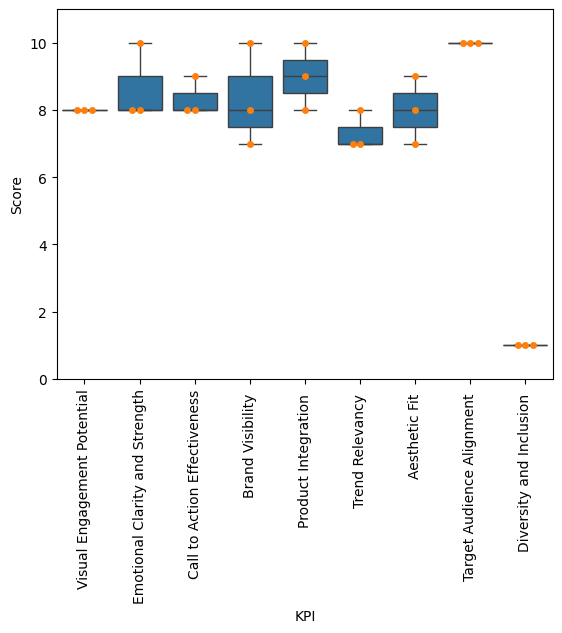

In [47]:
df_restrict = df[df["name"] == "wubbel.im.zauberwald"]

sns.boxplot(data=df_restrict, x="KPI", y="Score")
sns.swarmplot(data=df_restrict, x="KPI", y="Score")
plt.ylim([0,11])
plt.xticks(rotation=90)


In [60]:
output = replicate.run(
    "lucataco/videollama3-7b:34a1f45f7068f7121a5b47c91f2d7e06c298850767f76f96660450a0a3bd5bbe",
    input={
        "fps": 10,
        "top_p": 0.9,
        "video": 'https://scontent-mxp2-1.cdninstagram.com/o1/v/t16/f2/m86/AQM_eSQvD7zwrs_kK57cj-P9_M3YwlQBBLfhOs66zpHzGWRLHsdX4nUGAsVERfTbBYn1jkccJvCX9EeWOLbv7N0K1NyEH-uOqqizQr8.mp4?stp=dst-mp4&efg=eyJxZV9ncm91cHMiOiJbXCJpZ193ZWJfZGVsaXZlcnlfdnRzX290ZlwiXSIsInZlbmNvZGVfdGFnIjoidnRzX3ZvZF91cmxnZW4uY2xpcHMuYzIuNzIwLmJhc2VsaW5lIn0&_nc_cat=101&vs=1082698700551076_689384946&_nc_vs=HBksFQIYUmlnX3hwdl9yZWVsc19wZXJtYW5lbnRfc3JfcHJvZC9EMTQ3NEU1QTZGQjk2RjZDQThFQUE0Nzg1QzQ2Njg4M192aWRlb19kYXNoaW5pdC5tcDQVAALIARIAFQIYOnBhc3N0aHJvdWdoX2V2ZXJzdG9yZS9HSkVZaEIydDU4WVEydllFQU56cEttZnFIWkJXYnFfRUFBQUYVAgLIARIAKAAYABsAFQAAJrCUlcaQ8phAFQIoAkMzLBdANczMzMzMzRgSZGFzaF9iYXNlbGluZV8xX3YxEQB1%2Fgdl5p0BAA%3D%3D&_nc_rid=5aafd45464&ccb=9-4&oh=00_AfRsIF9RjPWXiPEwzaA7T2krsKZMQDWvDOE6C6znkiEcUA&oe=6885C555&_nc_sid=10d13b',
        "prompt": "The Call-To-Action Efficiency for this video is rated with a 1 out of 10, which means that no Call-to-Action is included in this video. Analyse the video step-by-step and recommend what scenes to add to the video to have a large Call-to-Action-Effiency score. The recommended scenes should fit into the tone of the video.",
        "max_frames": 180,
        "temperature": 0.2,
        "max_new_tokens": 2048
    })
